# Analyzing Borrowers’ Risk of Default

# Introduction

As a data analyst at a bank, I am tasked to prepare a report for a bank’s loan division. The main objective of the project is to find out if a customer’s marital status, loan purpose, income level, and number of children has an impact on whether they will default on a loan. My bank already has some data on customers’ credit worthiness.

My report will be considered when building a **credit scoring** of a potential customer. A **credit scoring** is used to evaluate the ability of a potential borrower to repay their loan.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Open-the-data-file-and-have-a-look-at-the-general-information." data-toc-modified-id="Step-1.-Open-the-data-file-and-have-a-look-at-the-general-information.-1">Step 1. Open the data file and have a look at the general information.</a></span><ul class="toc-item"><li><span><a href="#Interim-Conclusion" data-toc-modified-id="Interim-Conclusion-1.1">Interim Conclusion</a></span></li></ul></li><li><span><a href="#Step-2.-Data-preprocessing" data-toc-modified-id="Step-2.-Data-preprocessing-2">Step 2. Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Dealing-With-Missing-Values" data-toc-modified-id="Dealing-With-Missing-Values-2.1">Dealing With Missing Values</a></span></li><li><span><a href="#Data-type-replacement" data-toc-modified-id="Data-type-replacement-2.2">Data type replacement</a></span></li><li><span><a href="#Processing-duplicates" data-toc-modified-id="Processing-duplicates-2.3">Processing duplicates</a></span></li><li><span><a href="#Categorizing-Data" data-toc-modified-id="Categorizing-Data-2.4">Categorizing Data</a></span></li><li><span><a href="#Interim-Conclusion" data-toc-modified-id="Interim-Conclusion-2.5">Interim Conclusion</a></span></li></ul></li><li><span><a href="#Step-3.-Answering-key-questions" data-toc-modified-id="Step-3.-Answering-key-questions-3">Step 3. Answering key questions</a></span></li><li><span><a href="#Step-4.-General-conclusion" data-toc-modified-id="Step-4.-General-conclusion-4">Step 4. General conclusion</a></span></li></ul></div>

## Step 1. Open the data file and have a look at the general information. 

importing libraries, dataset, and view first five rows of data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("credit_scoring_eng.csv")
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


Checking general information of the data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


### Interim Conclusion
The general information shows there are missing values in two columns, i.e. `days_employed` and `total_income`. The data types look fine except `days_employed` which should be an integer type.
The data description shows there exist potential outliers in the data, for instance, in columns such as `children`, `days_employed`, and `total_income` as there are huge differences between the minimum and maximum values. Also, there exist substantial gap between the 75th percentile values and the maximum values. There are negative number of children and days employed which are clear and obvious errors.

## Step 2. Data preprocessing

### Dealing With Missing Values

**Processing missing values**

Checking total number of missing vaues in data

In [4]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Checking unique values in columns with object data type to have a better idea which values that are likely to contain the missing values in the two columns. Also, it would help to inspect if all string values are in lower case.

Unique values for income type

In [5]:
data["income_type"].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

Unique values for gender

In [6]:
data["gender"].unique()

array(['F', 'M', 'XNA'], dtype=object)

Locating the record for "XNA" to have an idea whether the customer could be a male or female

In [7]:
data[data["gender"] =="XNA"]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


There is not enough infomation whether this person is male or female so I will delete this record

In [8]:
data.drop(data[data["gender"]=="XNA"].index, inplace=True)
data["gender"].unique()

array(['F', 'M'], dtype=object)

Unique values for eduction

In [9]:
data["education"].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

As the column values have different letter cases, values that are suppose to be the same appear differently. These would affect the analysis, for instance, when checking for duplicates. Hence, there is the need to convert `education` column to lowercase

In [10]:
data['education'] = data[ 'education'].str.lower()
data["education"].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

Unique values for family status

In [11]:
data["family_status"].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

Unique valus for purpose

In [12]:
data["purpose"].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

**Filtering to See Where Missing Values May Exist** 

Student, unemployed, those aged 21 and below, primary and secondary eduction are likely to have not worked before and may not earn income; they may account for the missings values.
Therefore, the need to investigate.

In [13]:
data[(data["income_type"] =='student')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
9410,0,-578.751554,22,bachelor's degree,0,unmarried,4,M,student,0,15712.26,construction of own property


In [14]:
data[(data["income_type"] =='unemployed')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3133,1,337524.466835,31,secondary education,1,married,0,M,unemployed,1,9593.119,buying property for renting out
14798,0,395302.838654,45,bachelor's degree,0,civil partnership,1,F,unemployed,0,32435.602,housing renovation


In [15]:
data[data["dob_years"] < 21].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
42,0,-1257.496190,20,some college,2,unmarried,4,F,employee,0,13130.414,getting an education
99,0,346541.618895,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,-2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
153,1,-132.748536,20,secondary education,1,married,0,M,business,1,21560.120,housing
270,3,-1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation


In [16]:
data[(data["education"] =='primary education')].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
31,0,-1682.083438,47,primary education,3,married,0,F,employee,0,44077.710,housing
136,0,357880.159379,60,primary education,3,married,0,M,retiree,0,18099.872,transactions with my real estate
210,2,342167.212112,55,primary education,3,widow / widower,2,F,retiree,0,25701.619,building a real estate
211,0,-577.273434,41,primary education,3,civil partnership,1,F,employee,0,5863.853,second-hand car purchase
272,0,-5538.963731,35,primary education,3,civil partnership,1,M,employee,1,19810.253,to become educated


In [17]:
data[(data["education"] =='secondary education')].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
7,0,-152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education


It appears Student, unemployed, those aged 21 and below, primary and secondary eduction have all worked before.
There is the need to investigate income types,  days employed, and total income.

In [18]:
data[data['total_income'].isnull()]['income_type'].value_counts()

employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

In [19]:
data[data['days_employed'].isnull()]['income_type'].value_counts()

employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

The 2174 missing  values are in employee, business, retiree, civil servant , and an entrepreneur.The number of missing values for total income and days employed, grouped by income type are the same.This means they account for the same missing values. Hence, as days of work (employed) were missing,there were no corresponding income.

**Correcting Obvious Mistakes and Filling Missing Values**

Previewing description of quantitative data once more before filling missing values

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21524.0,0.538933,1.381615,-1.000000,0.000000,0.000000,1.000000,20.000000
days_employed,19350.0,63049.877770,140830.166081,-18388.949901,-2747.486276,-1203.307346,-291.077541,401755.400475
dob_years,21524.0,43.294276,12.574188,0.000000,33.000000,42.000000,53.000000,75.000000
education_id,21524.0,0.817181,0.548092,0.000000,1.000000,1.000000,1.000000,4.000000
family_status_id,21524.0,0.972542,1.420357,0.000000,0.000000,0.000000,1.000000,4.000000
debt,21524.0,0.080886,0.272667,0.000000,0.000000,0.000000,0.000000,1.000000
total_income,19350.0,26787.266688,16475.822926,3306.762000,16486.515250,23201.873500,32547.910750,362496.645000


Investigating the negative number of children

In [21]:
data["children"].value_counts()

 0     14148
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

"-1" number of children is a clear mistake so I will replace with 1. Also, 76 people as customers of a particular 
bank having 20 children seems highly unlikely. Hence,an obvious mistake. So I will replace with 2.

In [22]:
data.loc[data["children"]== -1, "children"]=1
data.loc[data["children"]== 20, "children"]=2
data["children"].value_counts()

0    14148
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Number of days employed can not be negative, I will take absolute values

In [23]:
data["days_employed"] = abs(data["days_employed"])
data["days_employed"].min()

24.14163324048118

The data description showed the maximum value in `days_employed` is 401755.400475.
Breaking down to numbers of years of work, i.e. 401755.400475/365 = 1101 years.
This is highly impossible. Hence, the need to investigate further.

Visualizing to see how the data is distributed

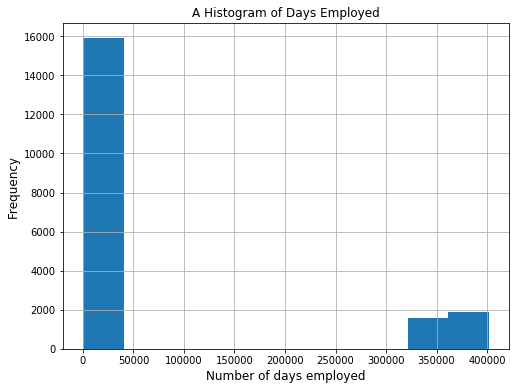

In [24]:
data["days_employed"].hist(figsize=(8,6))
plt.xlabel("Number of days employed", fontdict={"size":12})
plt.ylabel("Frequency", fontdict={"size":12})
plt.title("A Histogram of Days Employed", fontdict={"size":12})
plt.show()

The histogram shows extreme number of days employed begins around 325000 days.

Which income type(s) account for these?

In [25]:
data[data["days_employed"]>50000]["income_type"].value_counts()

retiree       3443
unemployed       2
Name: income_type, dtype: int64

In [26]:
data["income_type"].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

Except the 2 `unemployed` values, all the extreme `days_employed` values are retired customers. This indicates a bug in the data collection as customers that have retired so many years ago still had days (post working) counted as days employed. This error happened to more than three-quarters of retirees sampled. 

**What percentage of data points does these account for?**

In [27]:
print("The extreme values account for about {:.2%} of records".format((data[data["days_employed"]>50000].shape[0]/len(data))))

The extreme values account for about 16.01% of records


16.01% is a bit large to drop. Also, this column is not essential in achieving the main objective of the project, else, I would have filtered the extreme values out and continue to do the analysis. 

Since the missing values occurred with variables expected to have income or days employed, there is the need to fill. From the data description, the mean, median, and maximum values show there are potential outliers in the days employed column. Hence, it would be better to fill missing values with the median. Most extreme values  are accounted for by specific income types. So I would fill the median grouped by the income type.

In [28]:
data["days_employed"] = data["days_employed"].fillna(data.groupby("income_type")["days_employed"].transform("median"))
data["days_employed"].isnull().sum()

0

Rounding total income to two decimal places as it should be in currency.
Also, basing on potential outliers in the data, it would be better to fill missing values in `total_income` with median. Again, I would to fill by grouping total income by income type. 

In [29]:
data["total_income"] = round(data["total_income"],2)
data["total_income"] = data["total_income"].fillna(data.groupby("income_type")["total_income"].transform("median"))
data["total_income"].isnull().sum()

0

Checking to ensure there are no more missing values

In [30]:
data.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Obvious mistakes in the data have been corrected, missing values have been identified and filled.

### Data type replacement

Converting `days_employed` to integer as this can not have floating point values

In [31]:
data["days_employed"] =data["days_employed"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21524 non-null  int64  
 1   days_employed     21524 non-null  int64  
 2   dob_years         21524 non-null  int64  
 3   education         21524 non-null  object 
 4   education_id      21524 non-null  int64  
 5   family_status     21524 non-null  object 
 6   family_status_id  21524 non-null  int64  
 7   gender            21524 non-null  object 
 8   income_type       21524 non-null  object 
 9   debt              21524 non-null  int64  
 10  total_income      21524 non-null  float64
 11  purpose           21524 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


Data types duly replaced

### Processing duplicates

Previewing a sample of the data

In [32]:
data.sample()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2668,0,1371,52,secondary education,1,civil partnership,1,F,employee,0,29138.25,having a wedding


Counting duplicates in the entire dataset as individual columns do not have unique values (like id numbers) that can be detected. Deleting, for instance, repeated age is not feasible, deleting repeated total income would only delete all the median values. However, records that appear more than one in the dataset can be deleted. 

Checking duplicates in the dataset

In [33]:
data.duplicated().sum()

71

Droping duplicates

In [34]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

All duplicates are deleted

### Categorizing Data

Defining functions to catgorize the data

In [35]:
def income_group(income):
    """ This function returns group of incomes according to'total_income' values. This would be done as followes:
    - "low income", if total income < the median income. 
    - "middle income", if total income is between the  median income and the 75th percental value. 
    - "high income", if total income is above the 75th percental value. """
    total_income = income["total_income"]
    
    if total_income < data["total_income"].median():
        return "low income"
     
    elif total_income <= data["total_income"].quantile(0.75):
        return "middle income"
    
    return "high income"

data["income_group"] = data.apply(income_group, axis =1)
data["income_group"].value_counts()

low income       9773
middle income    6317
high income      5363
Name: income_group, dtype: int64

In [36]:
def credit(history):
    """ This function returns "defaulted" if a customer has ever defaulted on a loan, and "not_defaulted" if a customer has 
    has never defaluted on a loan according to'debt' values. This would be done as followes:
    - "defaulted", if debt = 1
    - "not_defaulted", if debt = 0 """
    debt = history["debt"]
    
    if debt == 1:
        return "defaulted"
    
    else:
        return "not_defaulted"

data["debt_history"] = data.apply(credit, axis =1)
data["debt_history"].value_counts()

not_defaulted    19712
defaulted         1741
Name: debt_history, dtype: int64

In [37]:
def purpose_grouping(classification):
    """ This function returns group of loan purposes according to'purpose' values. This would be done as follows:
    - "real_estate & housing", if the loan purpose is for house, property,or real estate.
    - "car purchase", if the loan purpose is for to buy car(s).
    - "education", if the loan purpose is education.
    - "wedding", if the loan purpose is for wedding. """
    
    purpose = classification["purpose"]
    
    if purpose=="wedding ceremony" or purpose=="having a wedding" or  purpose=="to have a wedding":
        return "wedding"
    
    elif purpose=="car" or purpose=="cars" or purpose=="to buy a car" or purpose=="car purchase" or purpose == "to own a car" or\
    purpose == "buying a second-hand car" or purpose == "second-hand car purchase" or purpose == "purchase of a car" or \
    purpose == "buying my own car" :
        return "car purchase"
    
    elif purpose=="to become educated" or purpose=="getting higher education" or  purpose=="profile education" or\
    purpose=="getting an education" or purpose=="to get a supplementary education" or purpose=="education"\
    or purpose=="university education"  or purpose=="supplementary education" or purpose=="going to university":
        return "education"
    
    return "real_estate and housing"

data["loan_purpose"] = data.apply(purpose_grouping, axis =1)
data["loan_purpose"].value_counts()

real_estate and housing    10810
car purchase                4306
education                   4013
wedding                     2324
Name: loan_purpose, dtype: int64

In [38]:
def kid_no_kid(child):
    """ This function returns group of customers with and witout children. This would be done as follows:
    - "kid", if the customer has at least one child
    - "without_kid", if the customer has no child. """
    
    children = child["children"]
    
    if children == 0:
        return "without_kid"
    
    return "kid"

data["kid_status"] = data.apply(kid_no_kid, axis =1)
data["kid_status"].value_counts()

without_kid    14090
kid             7363
Name: kid_status, dtype: int64

Total income has been categorized as low, middle, and high income. 
Debt has been categorized as; 1 = defaulted, and 0 = not_defaulted
Purpose has been grouped as real_estate and housing, car purchase,  education, and  wedding. 

**Dictionary selection**

Selecting columns that would help answer the project questions

In [39]:
analysis = data[["children", "kid_status", "family_status", "total_income", "loan_purpose", "income_group", "debt_history"]]
analysis.tail()

,children,kid_status,family_status,total_income,loan_purpose,income_group,debt_history
21448,1,kid,civil partnership,35966.70,real_estate and housing,high income,not_defaulted
21449,0,without_kid,married,24959.97,car purchase,middle income,not_defaulted
21450,1,kid,civil partnership,14347.61,real_estate and housing,low income,defaulted
21451,3,kid,married,39054.89,car purchase,high income,defaulted
21452,2,kid,married,13127.59,car purchase,low income,not_defaulted


### Interim Conclusion

Obvious mistakes in the data have been corrected, missing values have been identified and filled, data type(s) have been replaced with the required type(s), all duplicates are deleted, some columns are categorized, and essential columns are selected for analysis.


## Step 3. Answering key questions

**1. Is there a relation between having kids and repaying a loan on time?**

Building a DataFrame of debt history grouped by children, rename the column, and convert values to percentages 

In [40]:
kids = pd.DataFrame(analysis.groupby("children")["debt_history"].value_counts())
kids=kids.rename(columns={"debt_history": "debt share"})
having_kids = kids.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
having_kids

debt share
children debt_history             
0        not_defaulted   92.455642
         defaulted        7.544358
1        not_defaulted   90.834192
         defaulted        9.165808
2        not_defaulted   90.507519
         defaulted        9.492481
3        not_defaulted   91.818182
         defaulted        8.181818
4        not_defaulted   90.243902
         defaulted        9.756098
5        not_defaulted  100.000000

As "default rate" in the main interest in this project, I would filter the second index by "defaulted"

In [41]:
having_kids[having_kids.index.get_level_values(1)=="defaulted"]

,,debt share
children,debt_history,
0,defaulted,7.544358
1,defaulted,9.165808
2,defaulted,9.492481
3,defaulted,8.181818
4,defaulted,9.756098


There is no clear relation between having kids and repaying a loan on time. Considering 0,1, and 2 children, there is a trend but as the number of children increased to 3, 4, and 5, the oucomes are mixed. 

**Investigating further considering customers with and without kids.**

Building a DataFrame of debt history grouped by whether a customer has a child or not, i.e `kid_status`, rename the column, and convert values to percentages.

In [42]:
child = pd.DataFrame(analysis.groupby("kid_status")["debt_history"].value_counts())
child=child.rename(columns={"debt_history": "debt share"})
child_no_child = child.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
child_no_child[child_no_child.index.get_level_values(1)=="defaulted"]

,,debt share
kid_status,debt_history,
kid,defaulted,9.208203
without_kid,defaulted,7.544358


A customer with at least a kid has a default rate of about 9.2% while a custmer without a kid has a default rate of about 7.5%. Therefore, there is a relation between having kids and repaying a loan on time.

**2. Is there a relation between marital status and repaying a loan on time?**

Building a DataFrame of debt history grouped by marital status, rename the column, and converting share values to percentages. 

In [43]:
marital_status = pd.DataFrame(analysis.groupby("family_status")["debt_history"].value_counts())
marital_status=marital_status.rename(columns={"debt_history": "debt share"})
marital_status = marital_status.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
marital_status[marital_status.index.get_level_values(1)=="defaulted"]

,,debt share
family_status,debt_history,
civil partnership,defaulted,9.349398
divorced,defaulted,7.112971
married,defaulted,7.545182
unmarried,defaulted,9.750890
widow / widower,defaulted,6.569343


Yes, there is a relation between marital status and repaying a loan on time. Comparatively, unmarried and civil partners are more likely not to pay a loans on time. About 10% of unmarried have ever defaulted on their loan whilst about 9% of civil partner have ever defaulted on a loan. widow/widower is the least to default on a loan.

**3. Is there a relation between income level and repaying a loan on time?**

Building a DataFrame of debt history grouped by income group, rename the column, and converting share values to percentages

In [44]:
income_level=pd.DataFrame(analysis.groupby("income_group")["debt_history"].value_counts())
income_level=income_level.rename(columns={"debt_history": "debt share"})
income_level = income_level.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
income_level[income_level.index.get_level_values(1)=="defaulted"]

,,debt share
income_group,debt_history,
high income,defaulted,7.141525
low income,defaulted,8.308605
middle income,defaulted,8.643343


The result is a bit mixed as middle income earners are more likely to default on a loan compared to low income earners. Unsurprisingly, high income earners are the least to default on a loan.

**4. How do different loan purposes affect on-time repayment of the loan?**

Building a DataFrame of debt history grouped by loan purpose, rename the column, and converting share values to percentages

In [45]:
purpose =pd.DataFrame(analysis.groupby("loan_purpose")["debt_history"].value_counts())
purpose=purpose.rename(columns={"debt_history": "debt share"})
purpose = purpose.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
purpose[purpose.index.get_level_values(1)=="defaulted"]

,,debt share
loan_purpose,debt_history,
car purchase,defaulted,9.359034
education,defaulted,9.220035
real_estate and housing,defaulted,7.234043
wedding,defaulted,8.003442


If the pupose of a loan is for car purchase, then there is about 9.4% chance the customer would default. This is followed by eduction purpose with a default rate of about 9.2%. The least purpose for a loan repayment delay is when it is for real estate and housing (about 7.2% default rate)

## Step 4. General conclusion

- A customer with at least a kid is more likely to default on a loan than a customer without a kid, i.e. default rate of 9.2% compared to 7.5%.
- A customer's marital status would have an impact whether they would default of a loan or not. Unmarried and Civil partners are more likely to default on a loan (9.8% and 9.4%). Widow/widower is less likely to default on a loan (6.6%).
- Customers who demand for loan to purchase cars are more likely to default (9.4%) while those who demand for real estate and housing are least to default (7.2%). 
- Suprisingly, middle income earners are more likely to default on a loan (8.6%) than low income earners (8.3%). High income earners are the least to default on a loan (7.1%).
 